# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetv3.csv to datasetv3.csv


# Reading Data

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['datasetv3.csv']))

In [ ]:
# Mengubah nama kolom
df.columns= ['provinsi', 'kab/kota', 'produk', 'kategori', 'kualitas', 'harga_min', 'harga_max', 'harga_avg', 'harga_modal', 'penjualan', 'tanggal']

# Menambahkan kolom sales
df['sales']= df['harga_avg'] * df['penjualan']

# Melihat dataset
df

provinsi     kab/kota                 produk     kategori  kualitas  \
0     Jawa Barat        Bogor        Rok Midi Trendy          Rok    Import   
1     Jawa Barat  Tasikmalaya      Gelang Kulit Asli       Gelang  Standard   
2     Jawa Barat       Banjar      Gelang Kulit Asli       Gelang     Local   
3     Jawa Barat       Bekasi  Sweater Hoodie Sporty      Sweater    Import   
4     Jawa Barat       Ciamis  Sepatu Running Ringan       Sepatu    Import   
...          ...          ...                    ...          ...       ...   
1455  Jawa Barat       Bekasi  Gelang Tangan Vintage       Gelang  Standard   
1456  Jawa Barat      Cirebon    Parfum Wangi Floral       Parfum     Local   
1457  Jawa Barat       Cimahi    Tas Makeup Portable   Tas Makeup    Import   
1458  Jawa Barat       Bekasi     Baju Kebaya Elegan  Baju Kebaya   Premium   
1459  Jawa Barat     Kuningan    Celana Pendek Denim       Celana     Local   

      harga_min  harga_max  harga_avg  harga_modal  penjualan     tanggal  \
0         32000      51200      41600        25600         84  2020-01-02   
1         85000     136000     110500        68000         71  2020-01-03   
2         54000      86400      70200        43200         92  2020-01-04   
3         33000      52800      42900        26400        100  2020-01-05   
4        129000     206400     167700       103200         44  2020-01-06   
...         ...        ...        ...          ...        ...         ...   
1455      39000      62400      50700        31200          3  2023-12-27   
1456      20000      32000      26000        16000         10  2023-12-28   
1457     110000     176000     143000        88000         88  2023-12-29   
1458     105000     168000     136500        84000         93  2023-12-30   
1459      47000      75200      61100        37600         36  2023-12-31   

         sales  
0      3494400  
1      7845500  
2      6458400  
3      4290000  
4      7378800  
...        ...  
1455    152100  
1456    260000  
1457  12584000  
1458  12694500  
1459   2199600  

[1460 rows x 12 columns]

**Keterangan Variabel:**

* **provinsi:** nama provinsi tempat produk UMKM dipasarkan (hanya Jawa Barat)
* **kab/kota:** nama kabupaten/kota tempat produk UMKM dipasarkan
* **produk:** nama produk yang dijual oleh UMKM
* **kategori:** jenis produk yang dijual oleh UMKM
* **kualitas:** tingkat kualitas produk (Standard, Premium, Local, Import)
* **harga_min:** harga terendah dari produk yang dijual
* **harga_max:** harga tertinggi dari produk yang dijual
* **harga_avg:** harga rata-rata produk
* **harga_modal:** biaya produksi atau akuisisi produk
* **penjualan:** jumlah produk yang terjual dalam periode tertentu
* **tanggal:** tanggal ketika penjualan dilakukan
* **sales:** total penjualan (harga_avg * penjualan)


In [ ]:
# Mengidentifikasi tipe data masing-masing variabel
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['harga_min', 'harga_max', 'harga_avg', 'harga_modal', 'penjualan', 'sales'], object: ['provinsi', 'kab/kota', 'produk', 'kategori', 'kualitas', 'tanggal']}

In [ ]:
# Mengubah tipe data variabel Tanggal Penjualan menjadi datetime
df["tanggal"] = pd.to_datetime(df["tanggal"])

In [ ]:
# Mengelompokkan variabel sebagai numerical dan categorical columns
numerical_columns = df.select_dtypes(include='int64').columns
categorical_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns

In [ ]:
# Melihat kolom yang bertipe numerikal
numerical_columns

Index(['harga_min', 'harga_max', 'harga_avg', 'harga_modal', 'penjualan',
       'sales'],
      dtype='object')

In [ ]:
# Melihat kolom yang bertipe kategorikal
categorical_columns

Index(['provinsi', 'kab/kota', 'produk', 'kategori', 'kualitas', 'tanggal'], dtype='object')

In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   provinsi     1460 non-null   object        
 1   kab/kota     1460 non-null   object        
 2   produk       1460 non-null   object        
 3   kategori     1460 non-null   object        
 4   kualitas     1460 non-null   object        
 5   harga_min    1460 non-null   int64         
 6   harga_max    1460 non-null   int64         
 7   harga_avg    1460 non-null   int64         
 8   harga_modal  1460 non-null   int64         
 9   penjualan    1460 non-null   int64         
 10  tanggal      1460 non-null   datetime64[ns]
 11  sales        1460 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 137.0+ KB


Dari hasil di atas, terlihat bahwa **tidak ada missing value** dalam data yang kita miliki.


In [ ]:
# Cek duplikat data
df.duplicated().sum()

0

Dari hasil di atas, terlihat bahwa **tidak ada data duplikat** dalam data yang kita miliki.

## Descriptive Statistics

In [ ]:
# Melihat statistik deskriptif dari data
df.describe()

harga_min      harga_max      harga_avg    harga_modal  \
count    1460.000000    1460.000000    1460.000000    1460.000000   
mean    81104.109589  129766.575342  105435.342466   64883.287671   
std     45536.284859   72858.055774   59197.170317   36429.027887   
min     10000.000000   16000.000000   13000.000000    8000.000000   
25%     43000.000000   68800.000000   55900.000000   34400.000000   
50%     75500.000000  120800.000000   98150.000000   60400.000000   
75%    115000.000000  184000.000000  149500.000000   92000.000000   
max    199000.000000  318400.000000  258700.000000  159200.000000   

         penjualan         sales  
count  1460.000000  1.460000e+03  
mean     50.116438  5.260607e+06  
std      29.291195  4.577391e+06  
min       1.000000  1.430000e+04  
25%      25.000000  1.657500e+06  
50%      50.000000  3.901950e+06  
75%      76.000000  7.842575e+06  
max     100.000000  2.421120e+07

## Unique & Frequency

In [ ]:
# Periksa nilai unik dan frekuensinya
numeric_unique_values = {column: df[column].unique() for column in df.select_dtypes(include='int64').columns}
numeric_value_frequencies = {column: df[column].value_counts() for column in df.select_dtypes(include='int64').columns}

categorical_unique_values = {column: df[column].unique() for column in df.select_dtypes(include=['object', 'datetime64[ns]']).columns}
categorical_value_frequencies = {column: df[column].value_counts() for column in df.select_dtypes(include=['object', 'datetime64[ns]']).columns}

### Variabel Numerik

In [ ]:
print("Nilai Unik Numerik:")
for column, values in numeric_unique_values.items():
    print(f"{column}: {values}")
    print()

Nilai Unik Numerik:
harga_min: [ 32000  85000  54000  33000 129000  35000 197000  39000 191000  55000
  34000 168000  89000 137000  31000 100000 109000  77000  19000  80000
  36000  50000 104000  94000  76000  29000 122000  64000  81000 146000
  38000  98000  78000 134000  30000 150000 114000  97000 125000 141000
 103000 131000 135000  37000  92000  95000  52000 105000 111000  57000
 108000 140000  93000  12000  46000 198000  47000 101000 147000 194000
  75000  96000 180000  26000  63000 117000 136000 133000 116000  74000
  24000  58000 106000  44000 138000  20000  49000 144000  72000  23000
 159000  59000 154000  61000  45000  90000 158000 113000  69000  40000
 128000  51000  13000  15000  21000 143000  42000 127000  18000 126000
  28000  67000  53000  68000  41000  83000  88000 161000 148000  65000
  62000  70000 139000 142000  14000 120000 110000 184000 112000 173000
  11000 193000 164000 107000 178000  27000  82000  99000  79000  22000
  71000  10000  84000 102000  56000  60000  66

In [ ]:
print("Frekuensi Nilai Numerik:")
for column, frequencies in numeric_value_frequencies.items():
    print(f"{column}:\n{frequencies}")
    print()

Frekuensi Nilai Numerik:
harga_min:
50000     27
34000     20
31000     19
57000     18
61000     18
          ..
170000     1
199000     1
165000     1
186000     1
196000     1
Name: harga_min, Length: 184, dtype: int64

harga_max:
80000     27
54400     20
49600     19
91200     18
97600     18
          ..
272000     1
318400     1
264000     1
297600     1
313600     1
Name: harga_max, Length: 184, dtype: int64

harga_avg:
65000     27
44200     20
40300     19
74100     18
79300     18
          ..
221000     1
258700     1
214500     1
241800     1
254800     1
Name: harga_avg, Length: 184, dtype: int64

harga_modal:
40000     27
27200     20
24800     19
45600     18
48800     18
          ..
136000     1
159200     1
132000     1
148800     1
156800     1
Name: harga_modal, Length: 184, dtype: int64

penjualan:
90    24
30    24
17    24
3     22
4     22
      ..
88     8
98     7
45     7
95     7
28     6
Name: penjualan, Length: 100, dtype: int64

sales:
3120000     5
9984

### Variabel Kategorik

In [ ]:
print("Nilai Unik Kategorikal:")
for column, values in categorical_unique_values.items():
    print(f"{column}: {values}")
    print()

Nilai Unik Kategorikal:
provinsi: ['Jawa Barat']

kab/kota: ['Bogor' 'Tasikmalaya' 'Banjar' 'Bekasi' 'Ciamis' 'Bandung Barat'
 'Kuningan' 'Purwakarta' 'Karawang' 'Garut' 'Depok' 'Sumedang' 'Cianjur'
 'Majalengka' 'Indramayu' 'Cirebon' 'Bandung' 'Subang' 'Sukabumi' 'Cimahi']

produk: ['Rok Midi Trendy' 'Gelang Kulit Asli' 'Sweater Hoodie Sporty'
 'Sepatu Running Ringan' 'Kaos Polo Pria' 'Tas Backpack Casual'
 'Celana Cargo Praktis' 'Gelang Fashion Trendy' 'Tas Sling Bag Trendy'
 'Topi Beanie Hangat' 'Sepatu Sneakers' 'Baju Kebaya Elegan'
 'Sepatu High Heels Glamor' 'Sepatu Loafer Formal' 'Blouse Wanita Elegan'
 'Tas Makeup Portable' 'Lipstik Velvet Matte' 'Parfum Floral Fruity'
 'Rok Mini Trendy' 'Kacamata Oversize Stylish' 'Kemeja Kotak-Kotak'
 'Celana Legging Nyaman' 'Anting Emas Cantik' 'Celana Jeans Slim Fit'
 'Gelang Tangan Vintage' 'Anting Gantung Unik' 'Dompet Wanita Stylish'
 'Baju Koko Modern' 'Topi Trucker Trendy' 'Celana Chino Slim Fit'
 'Lipstik Matte Long-lasting' 'Sepatu B

In [ ]:
print("Frekuensi Nilai Kategorikal:")
for column, frequencies in categorical_value_frequencies.items():
    print(f"{column}:\n{frequencies}")
    print()

Frekuensi Nilai Kategorikal:
provinsi:
Jawa Barat    1460
Name: provinsi, dtype: int64

kab/kota:
Cirebon          150
Bekasi           121
Depok            107
Kuningan          75
Cimahi            74
Garut             73
Majalengka        73
Karawang          71
Subang            67
Bandung           66
Tasikmalaya       64
Ciamis            62
Purwakarta        62
Sukabumi          62
Bogor             61
Indramayu         58
Bandung Barat     57
Banjar            53
Sumedang          52
Cianjur           52
Name: kab/kota, dtype: int64

produk:
Gelang Kulit Asli         61
Blouse Wanita Elegan      57
Tas Sling Bag Trendy      55
Sepatu Loafer Formal      55
Celana Legging Nyaman     54
                          ..
Tas Selempang Chic         4
Jas Pria Slim Fit          4
Kacamata Retro Vintage     4
Jas Blazer Slim Fit        4
Tas Pesta Glamor           3
Name: produk, Length: 84, dtype: int64

kategori:
Tas            170
Sepatu         152
Celana         140
Gelang         128

## Korelasi

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


harga_min  harga_max  harga_avg  harga_modal  penjualan     sales
harga_min     1.000000   1.000000   1.000000     1.000000  -0.013526  0.638688
harga_max     1.000000   1.000000   1.000000     1.000000  -0.013526  0.638688
harga_avg     1.000000   1.000000   1.000000     1.000000  -0.013526  0.638688
harga_modal   1.000000   1.000000   1.000000     1.000000  -0.013526  0.638688
penjualan    -0.013526  -0.013526  -0.013526    -0.013526   1.000000  0.662687
sales         0.638688   0.638688   0.638688     0.638688   0.662687  1.000000

# Exploratory Data Analysis

## Histogram

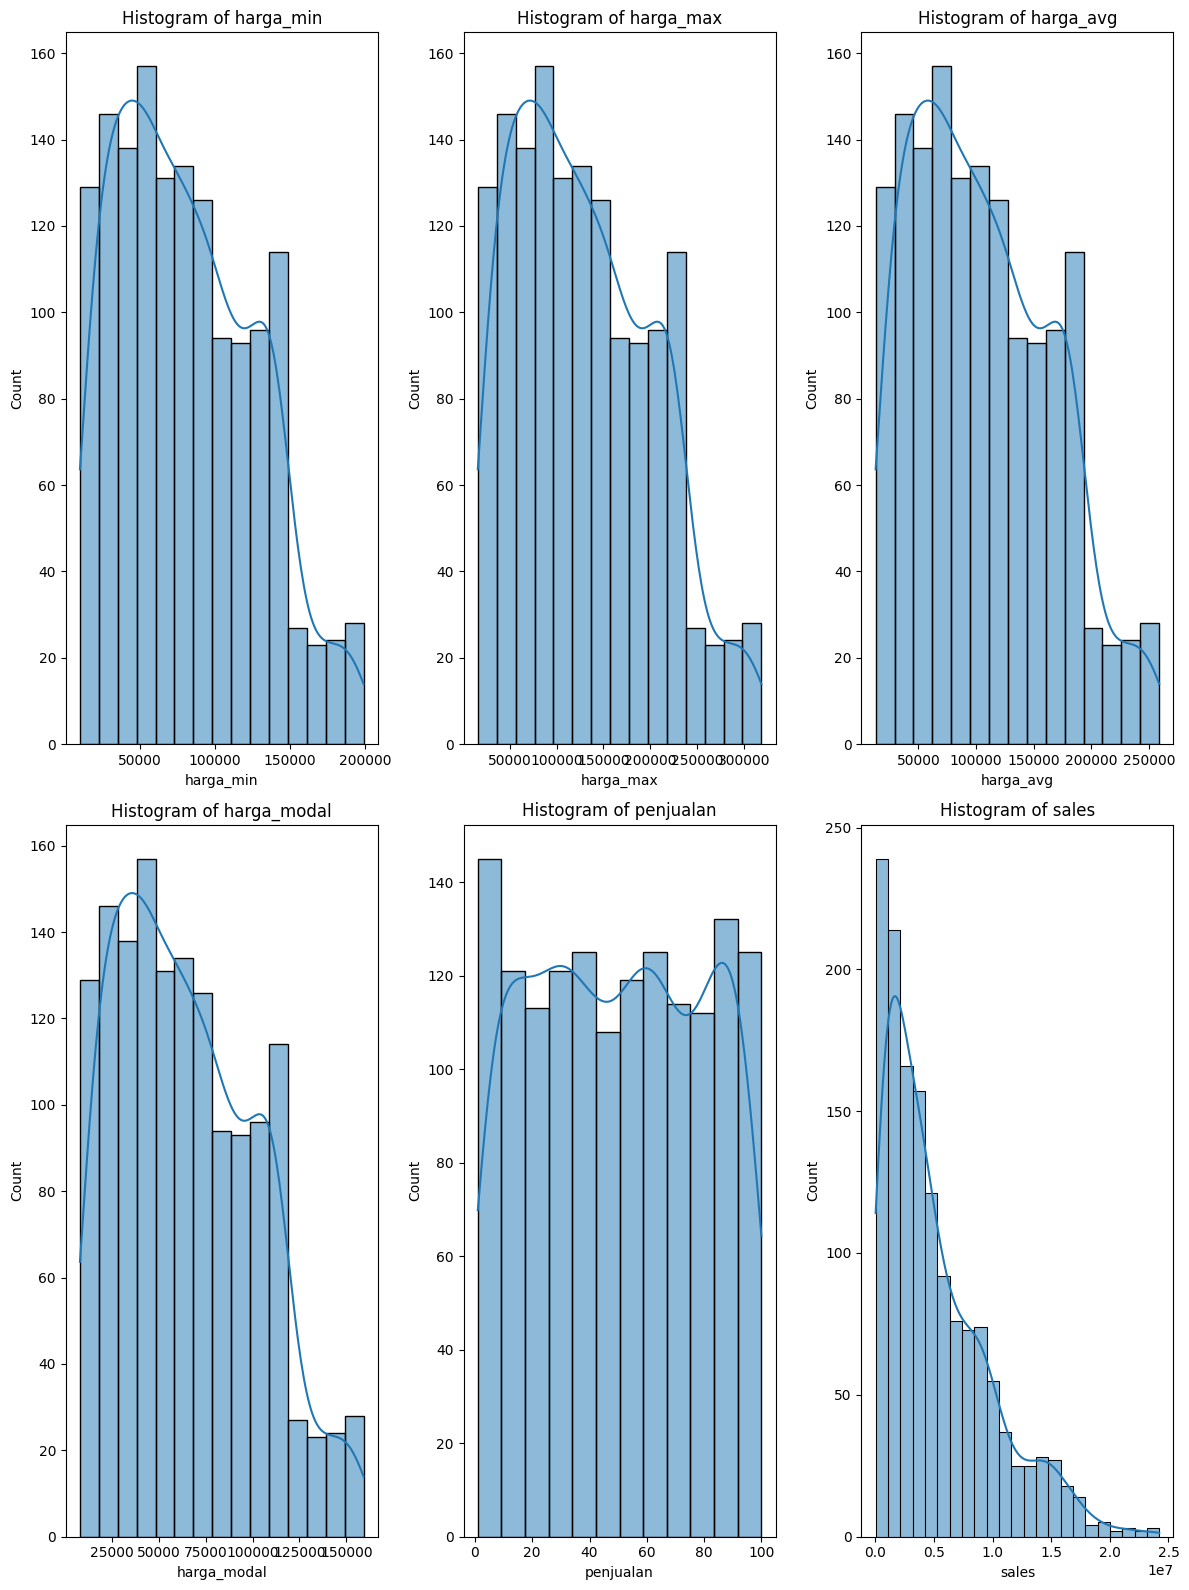

In [ ]:
plt.figure(figsize=(12, 16))
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Tentukan jumlah baris dan kolom untuk subplot
num_rows = (num_numerical_columns // 3) + min(num_numerical_columns % 3, 1)
num_cols = min(num_numerical_columns, 3)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## Box Plot

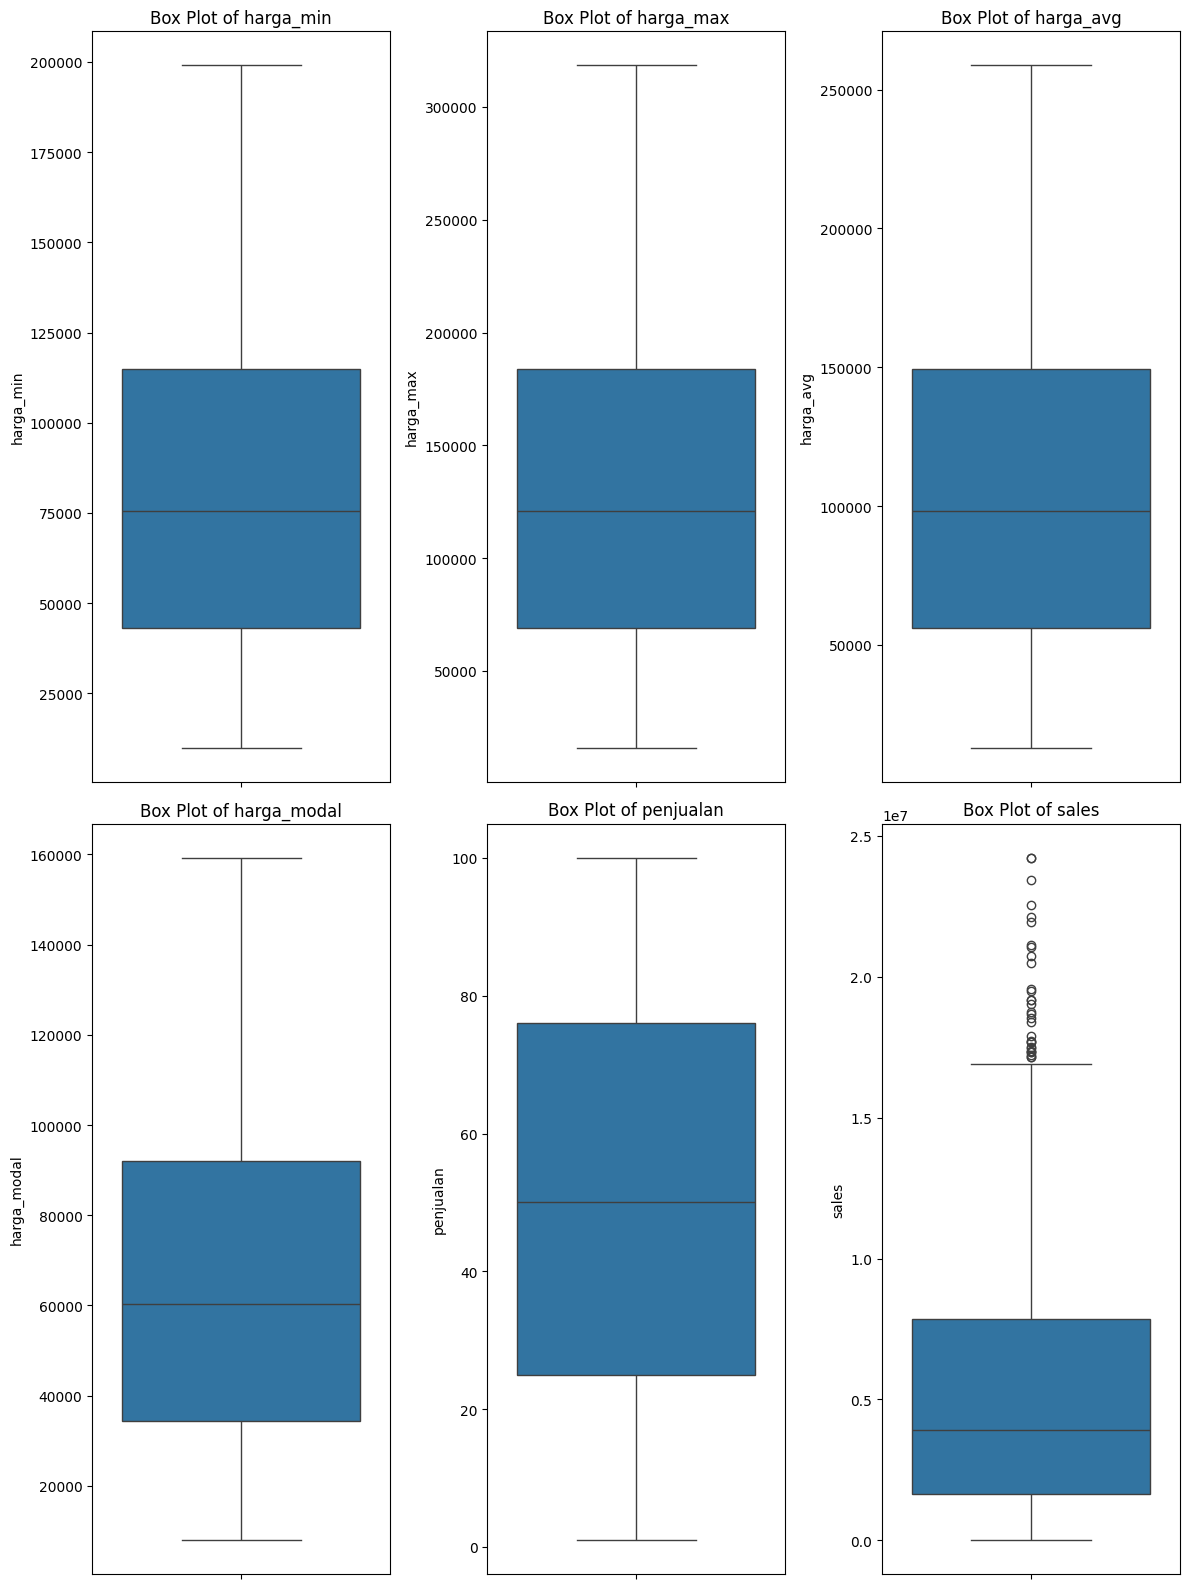

In [ ]:
plt.figure(figsize=(12, 16))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

## Heatmap Korelasi

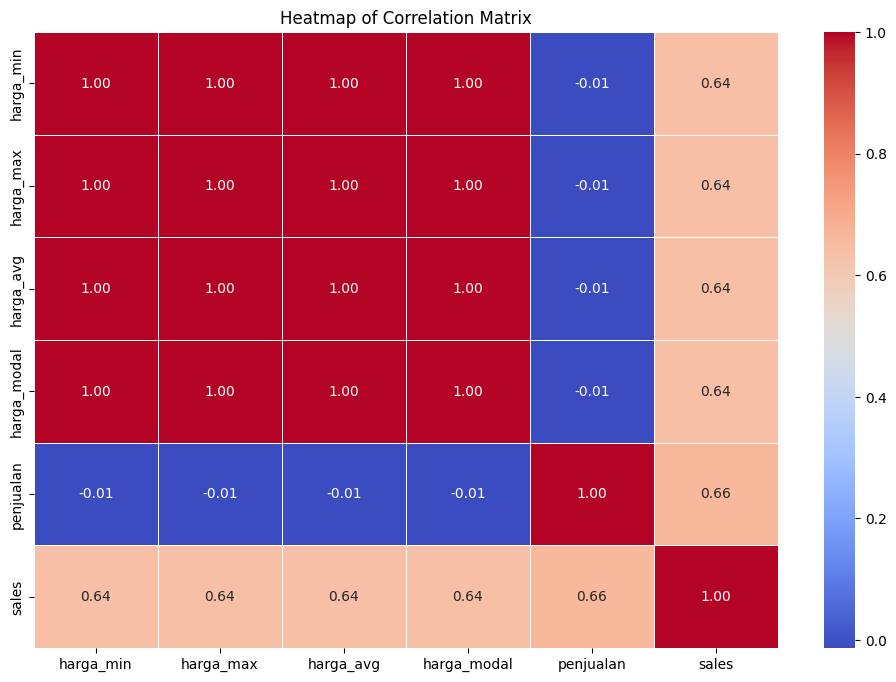

In [ ]:
# Hitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Bagaimana tren penjualan berubah seiring waktu?

### Tren penjualan bulanan

In [ ]:
a = df.set_index("tanggal").resample("M").penjualan.mean().reset_index()
a["tahun"] = a.tanggal.dt.year
px.line(a, x='tanggal', y='penjualan', color='tahun',title = "Monthly Average Transactions" )

### Tren penjualan mingguan

In [ ]:
penjualan_week = df.copy()
penjualan_week["year"] = penjualan_week.tanggal.dt.year
penjualan_week["dayofweek"] = penjualan_week.tanggal.dt.dayofweek+1
penjualan_week = penjualan_week.groupby(["year", "dayofweek"]).penjualan.mean().reset_index()
px.line(penjualan_week, x="dayofweek", y="penjualan" , color = "year", title = "Weekly Average Transactions")

## Variasi Penjualan Sepanjang Tahun

In [ ]:
var_penjualan = df.copy()
var_penjualan['tahun'] = var_penjualan.tanggal.dt.year
var_penjualan['bulan']= var_penjualan.tanggal.dt.month
px.box(var_penjualan.sort_values(by='bulan'), x="tahun", y="penjualan" , color = "bulan", title = "Variasi Penjualan Sepanjang Tahun")

### Hubungan antara Sales dengan Tanggal

In [ ]:
fig = px.scatter(df, x='tanggal', y='sales', trendline="ols", title="Hubungan antara Sales dengan Tanggal")
fig.show()

### Hubungan antara Penjualan dengan Tanggal

In [ ]:
fig = px.scatter(df, x='tanggal', y='penjualan', trendline="ols", title="Hubungan antara Penjualan dengan Tanggal")
fig.show()

### Hubungan antara Sales dengan Penjualan

In [ ]:
px.scatter(df, x = "penjualan", y = "sales", trendline = "ols", trendline_color_override = "red", title="Hubungan antara Sales dengan Penjualan")

## Mana kabupaten/kota yang memiliki penjualan tertinggi?

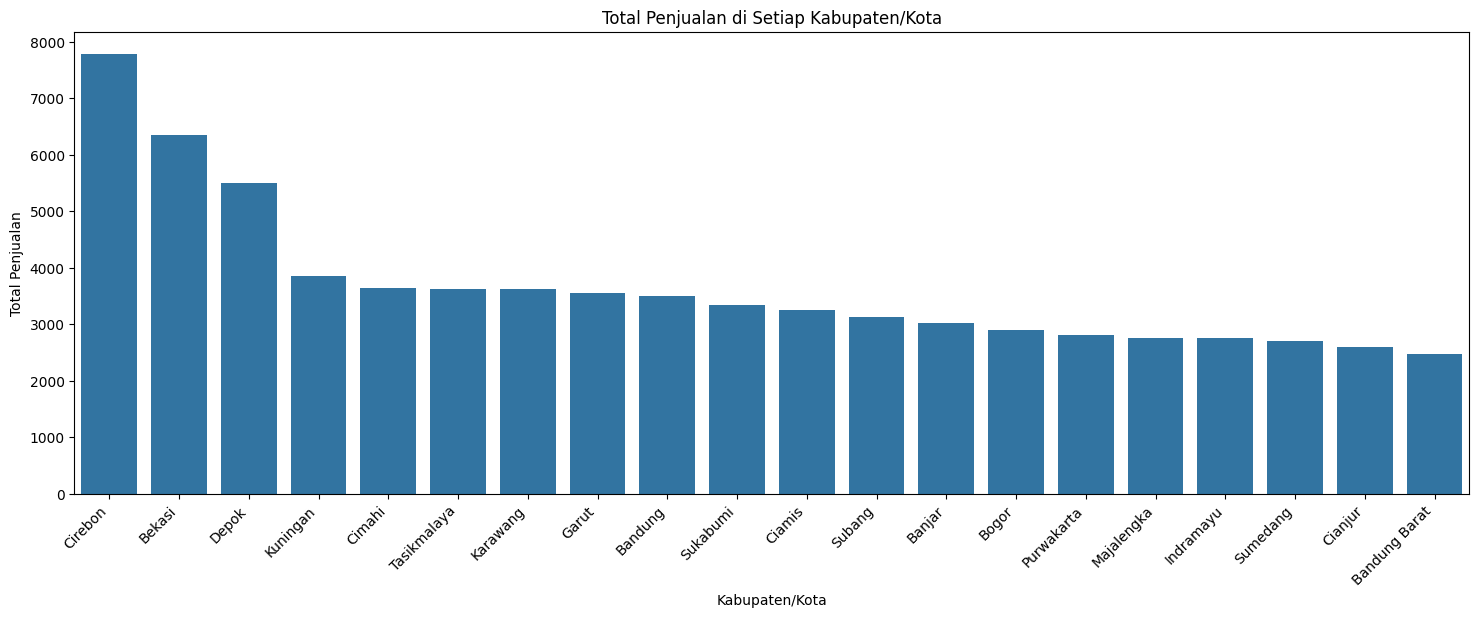

In [ ]:
# Menghitung total penjualan dari tiap kab/kota
penjualan_kota = df.groupby(["kab/kota"])[['penjualan']].sum().sort_values(by='penjualan', ascending=False)

# Membuat bar chart untuk berdasarkan penjualan
plt.figure(figsize=(18, 6))
sns.barplot(x = 'kab/kota', y = 'penjualan', data = penjualan_kota)
plt.title('Total Penjualan di Setiap Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
penjualan_kota

penjualan
kab/kota                
Cirebon             7785
Bekasi              6354
Depok               5500
Kuningan            3861
Cimahi              3634
Tasikmalaya         3631
Karawang            3620
Garut               3556
Bandung             3498
Sukabumi            3333
Ciamis              3256
Subang              3127
Banjar              3022
Bogor               2890
Purwakarta          2815
Majalengka          2758
Indramayu           2755
Sumedang            2701
Cianjur             2601
Bandung Barat       2473

In [ ]:
# Mengambil 3 kab/kota teratas berdasarkan total penjualan
top_3_kota = penjualan_kota['penjualan'].nlargest(3).index

# Filter data hanya untuk 3 kota teratas
filtered_df = df[df["kab/kota"].isin(top_3_kota)]

# Visualisasi data dengan plot menggunakan Plotly Express
fig = px.line(filtered_df.sort_values(["kab/kota", "tanggal"]), x='tanggal', y='penjualan', color='kab/kota',title = "Top 3 Kota dengan Penjualan Tertinggi")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Daily Sales untuk Setiap Kabupaten/Kota

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Mengatur indeks berdasarkan kolom "tanggal"
city_daily_sales = df.set_index("tanggal").groupby("kab/kota").resample("D").sales.sum().reset_index()

# Membuat subplot 5x4
fig = sp.make_subplots(rows=5, cols=4, subplot_titles=city_daily_sales["kab/kota"].unique())

# Menambahkan setiap plot garis ke subplot
for i, kota in enumerate(city_daily_sales["kab/kota"].unique()):
    data = city_daily_sales[city_daily_sales["kab/kota"] == kota]
    trace = go.Scatter(x=data["tanggal"], y=data["sales"], mode="lines", name=kota)
    fig.add_trace(trace, row=(i // 4) + 1, col=(i % 4) + 1)

# Mengatur tata letak dan judul
fig.update_layout(title="Daily Sales by City", showlegend=False, height=1800, width=1500)

# Menampilkan plot
fig.show()

## Korelasi antara Sales di Berbagai Kabupaten/Kota

<ipython-input-32-7e238f7e6846>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-7e238f7e6846>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



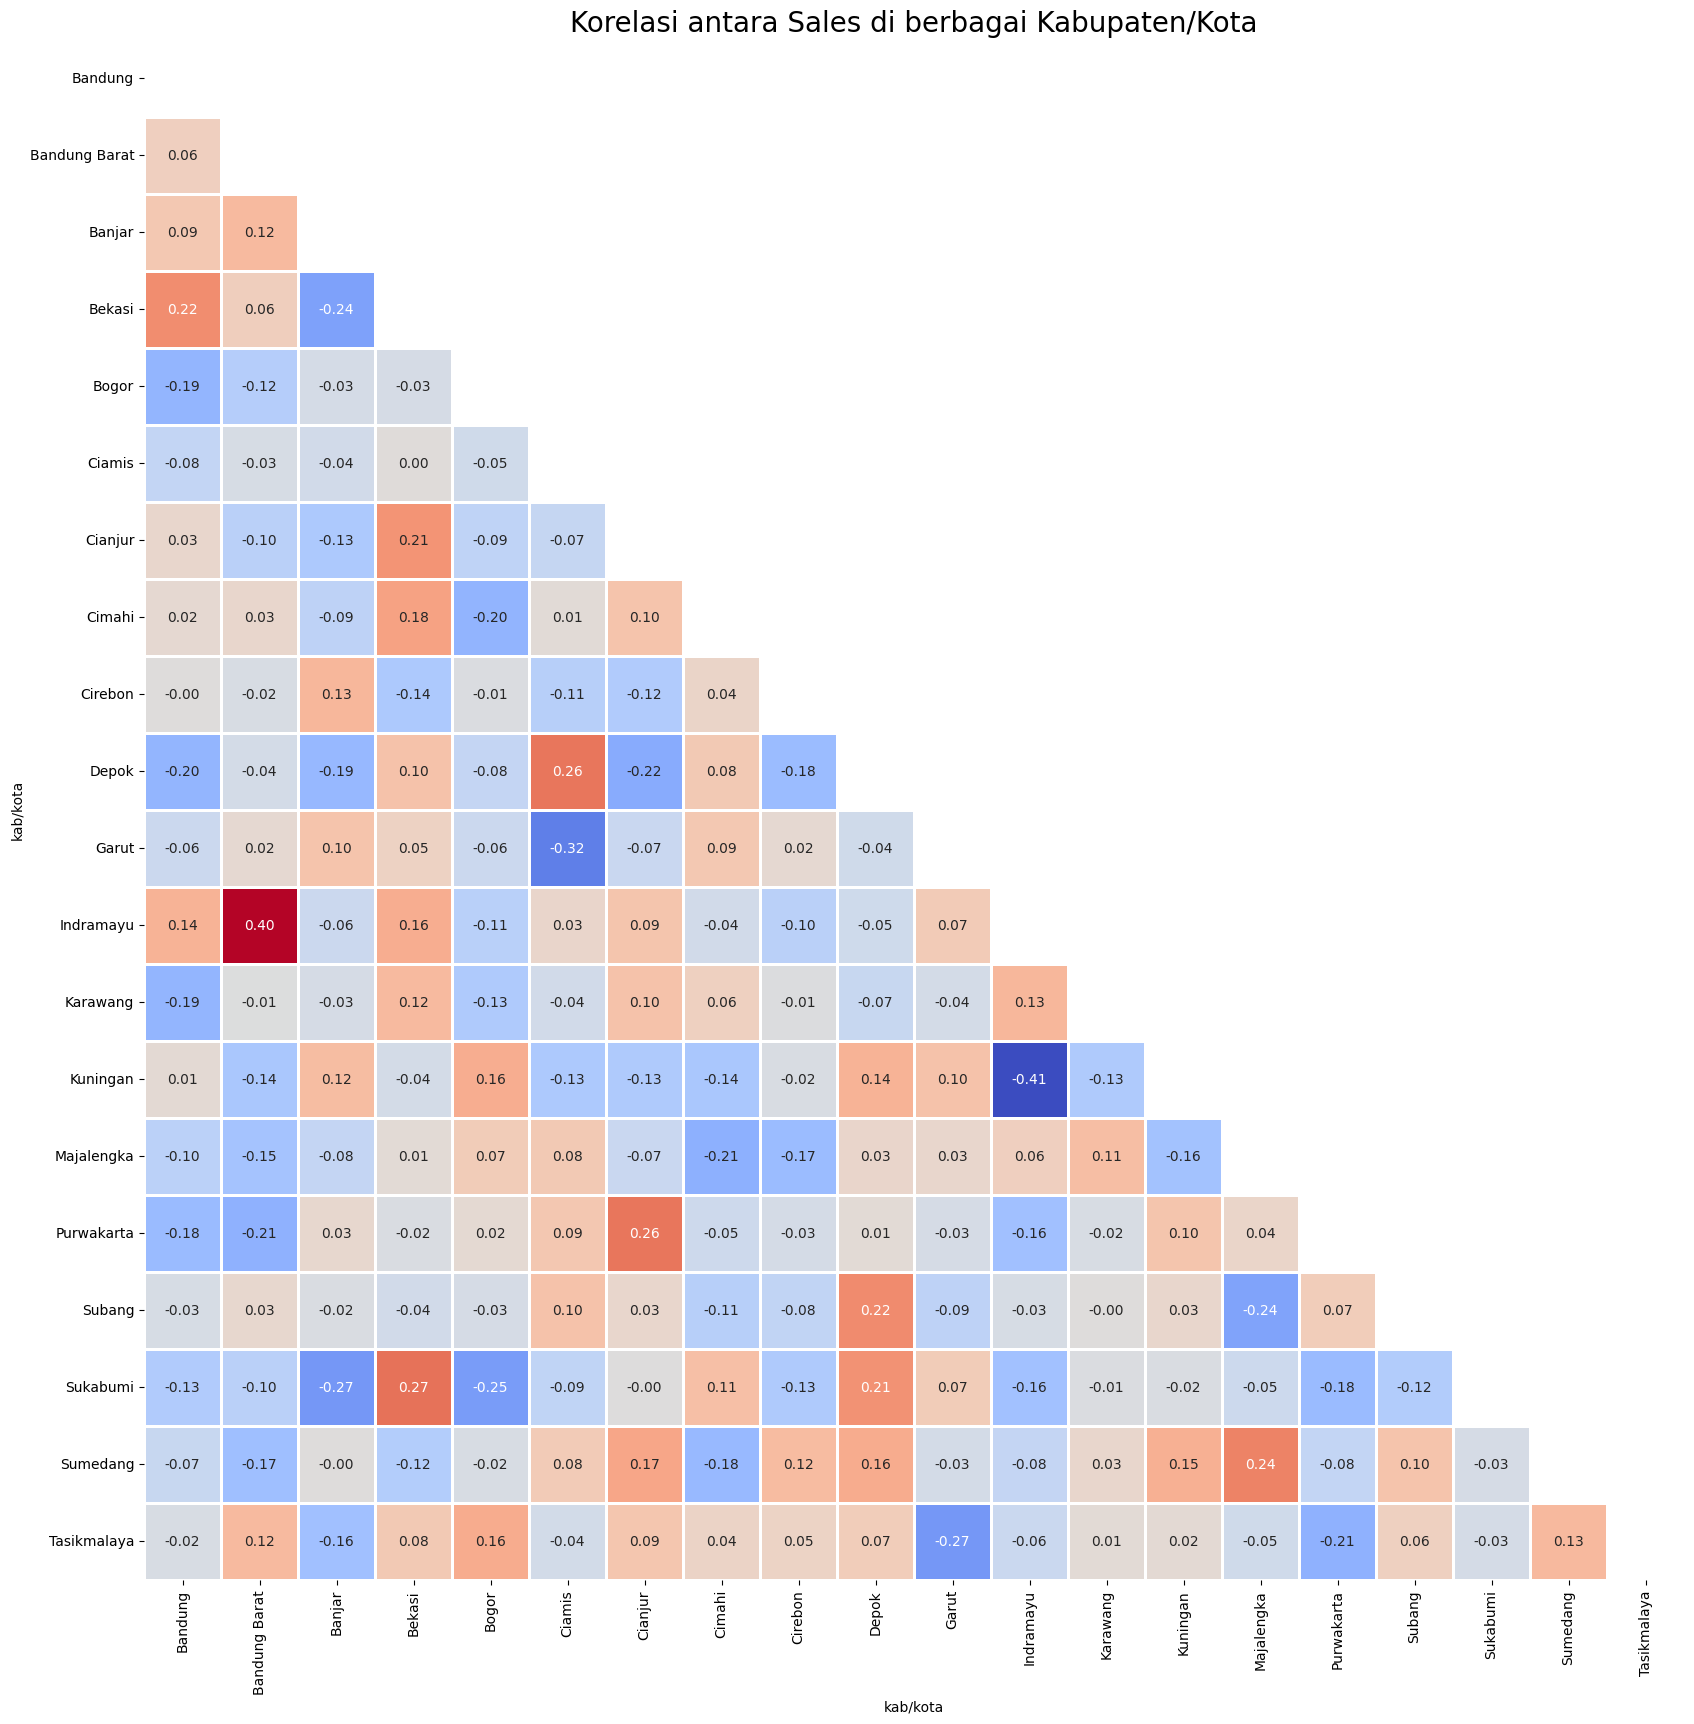

In [ ]:
city_sales = df[["kab/kota", "sales"]]
city_sales["ind"] = 1
city_sales["ind"] = city_sales.groupby("kab/kota").ind.cumsum().values
city_sales = pd.pivot(city_sales, index = "ind", columns = "kab/kota", values = "sales").corr()
mask = np.triu(city_sales.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(city_sales,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Korelasi antara Sales di berbagai Kabupaten/Kota",fontsize = 20)
plt.show()

## Kategori produk mana yang memberikan kontribusi terbesar pada sales?

In [ ]:
kategori_sales = df.groupby("kategori").sales.mean().sort_values(ascending = False).reset_index()
px.bar(kategori_sales, y = "kategori", x="sales", color = "kategori", title = "Kategori produk mana memberikan kontribusi terbesar pada sales?")

## Daily Sales berdasarkan Kategori

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Mengatur indeks berdasarkan kolom "tanggal"
cat_daily_sales = df.set_index("tanggal")

# Melakukan pengelompokan berdasarkan kolom "kategori" dan resampling harian
cat_daily_sales = cat_daily_sales.groupby("kategori").resample("D").sales.sum().reset_index()

# Membuat subplot 10x3
fig = sp.make_subplots(rows=10, cols=3, subplot_titles=cat_daily_sales["kategori"].unique())

# Menambahkan setiap plot garis ke subplot
for i, kategori in enumerate(cat_daily_sales["kategori"].unique()):
    data = cat_daily_sales[cat_daily_sales["kategori"] == kategori]
    trace = go.Scatter(x=data["tanggal"], y=data["sales"], mode="lines", name=kategori)
    fig.add_trace(trace, row=(i // 3) + 1, col=(i % 3) + 1)

# Mengatur tata letak dan judul
fig.update_layout(title="Daily Sales by Category", showlegend=False, height=2000, width=1000)

# Menampilkan plot
fig.show()

## Apakah kualitas produk mempengaruhi penjualan?

In [ ]:
# Menghitung total penjualan dari tiap kab/kota
penjualan_kualitas = df.groupby(["kualitas"])[['penjualan']].sum().sort_values(by='penjualan', ascending=False)
penjualan_kualitas

penjualan
kualitas           
Premium       19025
Standard      18343
Import        18305
Local         17497

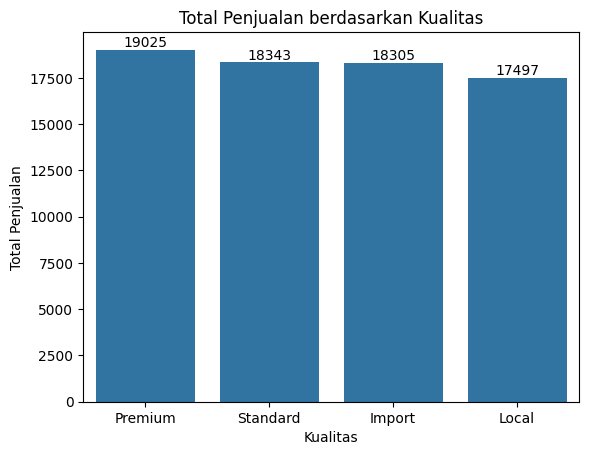

In [ ]:
# Membuat bar chart untuk berdasarkan penjualan
ax = sns.barplot(x = 'kualitas', y = 'penjualan', data = penjualan_kualitas)
plt.title('Total Penjualan berdasarkan Kualitas')
plt.xlabel('Kualitas')
plt.ylabel('Total Penjualan')
ax.bar_label(ax.containers[0])
plt.show()

# Time Series Analysis

## Import Library

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from collections import defaultdict
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.api import acf, pacf, ccf, VAR, adfuller, coint
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=df[['tanggal', 'penjualan']]
df.set_index('tanggal', inplace=True)
df.head()

penjualan
tanggal              
2020-01-02         84
2020-01-03         71
2020-01-04         92
2020-01-05        100
2020-01-06         44

## Data Preparation

### Transformation

In [ ]:
# Transformasi log untuk positive forecast
df["log_penjualan"] = np.log(df["penjualan"])

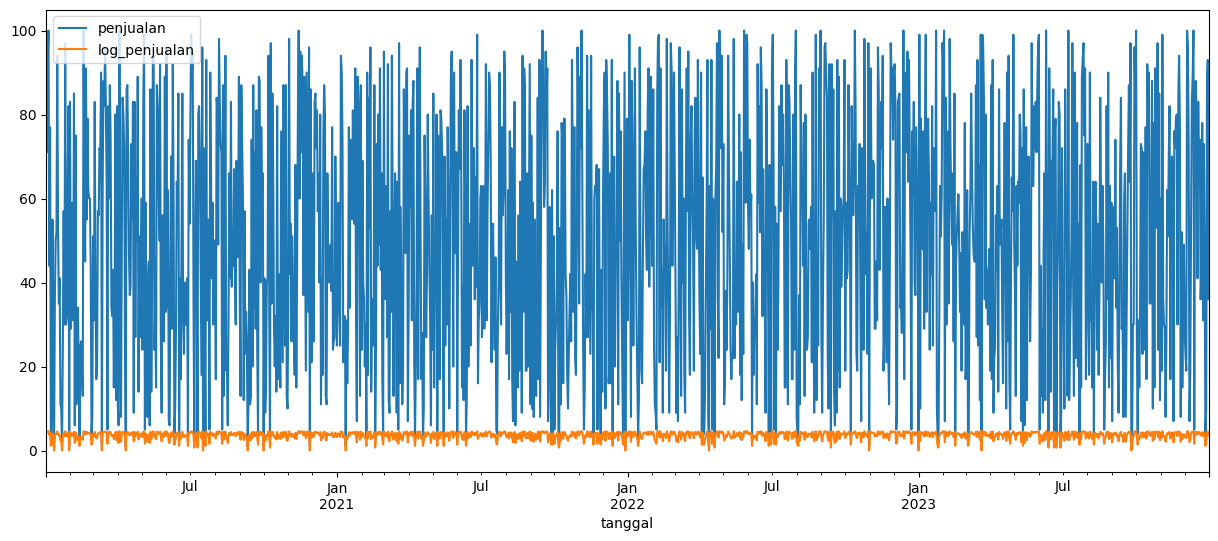

In [ ]:
df['penjualan'].plot(figsize=(15,6), legend= True)
df['log_penjualan'].plot(figsize=(15,6), legend= True)
plt.show()

### Plot

#### Time plot

<Axes: xlabel='tanggal'>

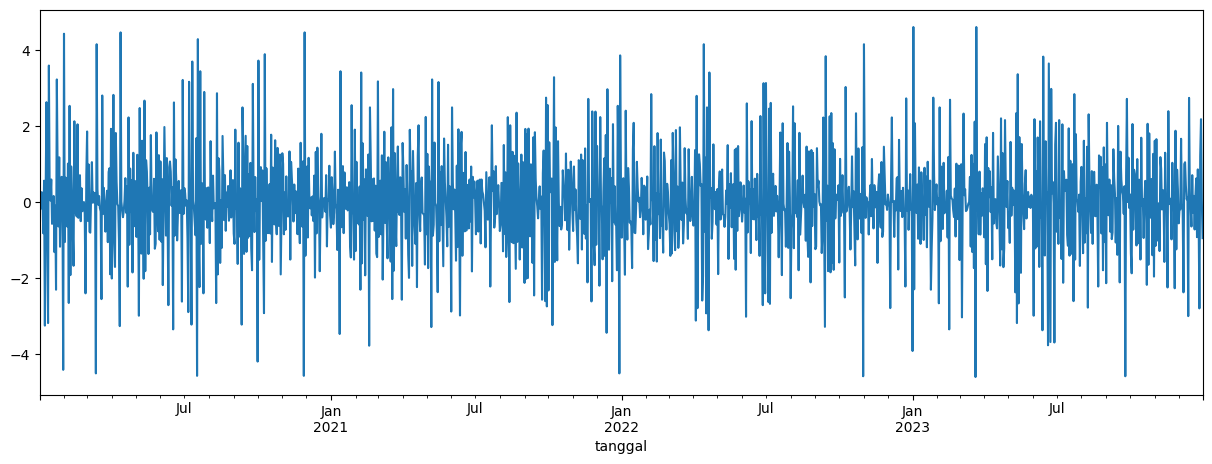

In [ ]:
df['diff_log_penjualan'] = np.log(df['penjualan']).diff()
df['diff_log_penjualan'].plot(figsize=(15,5))

#### ACF & PACF plots

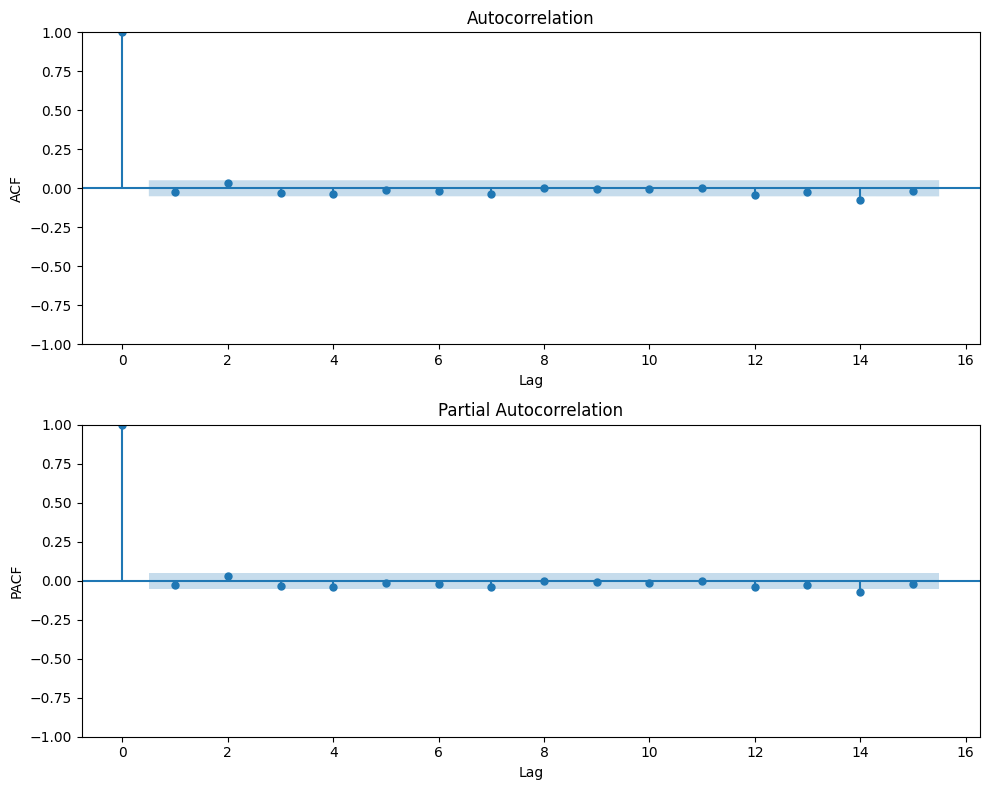

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["penjualan"], lags=15, ax=ax1)
plt.xlabel("Lag")
plt.ylabel("ACF")

# Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["penjualan"], lags=15, ax=ax2)
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.tight_layout();
plt.show()

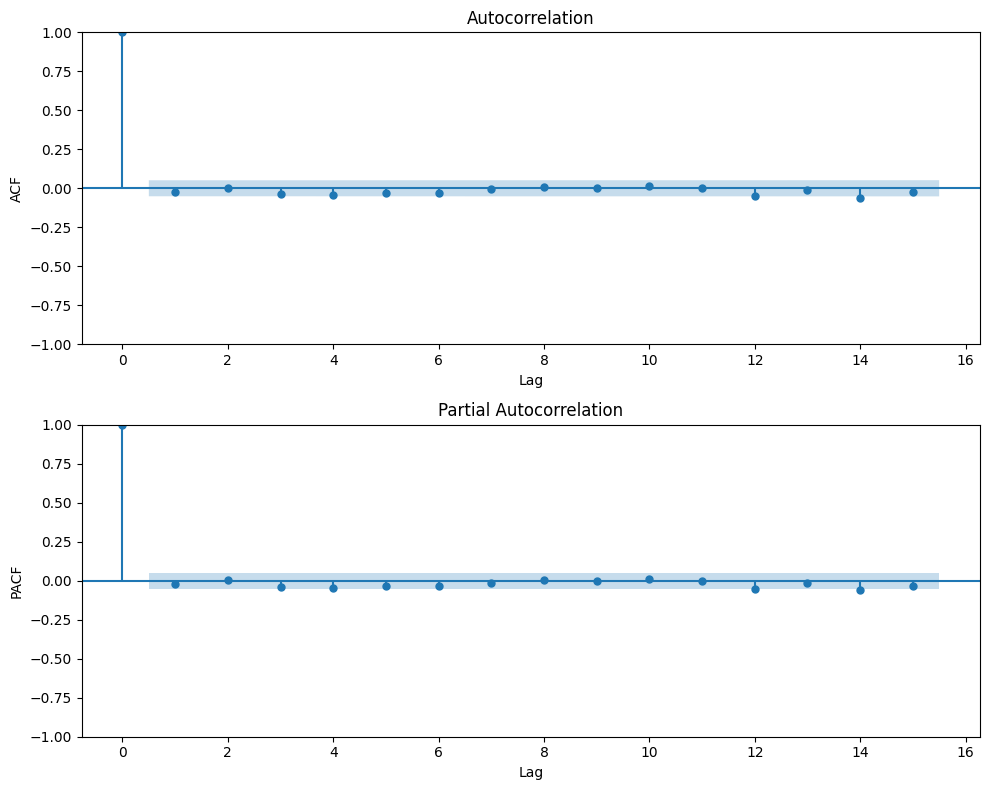

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["log_penjualan"].dropna(), lags=15, ax=ax1)
plt.xlabel("Lag")
plt.ylabel("ACF")

# Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["log_penjualan"].dropna(), lags=15, ax=ax2)
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.tight_layout();
plt.show()

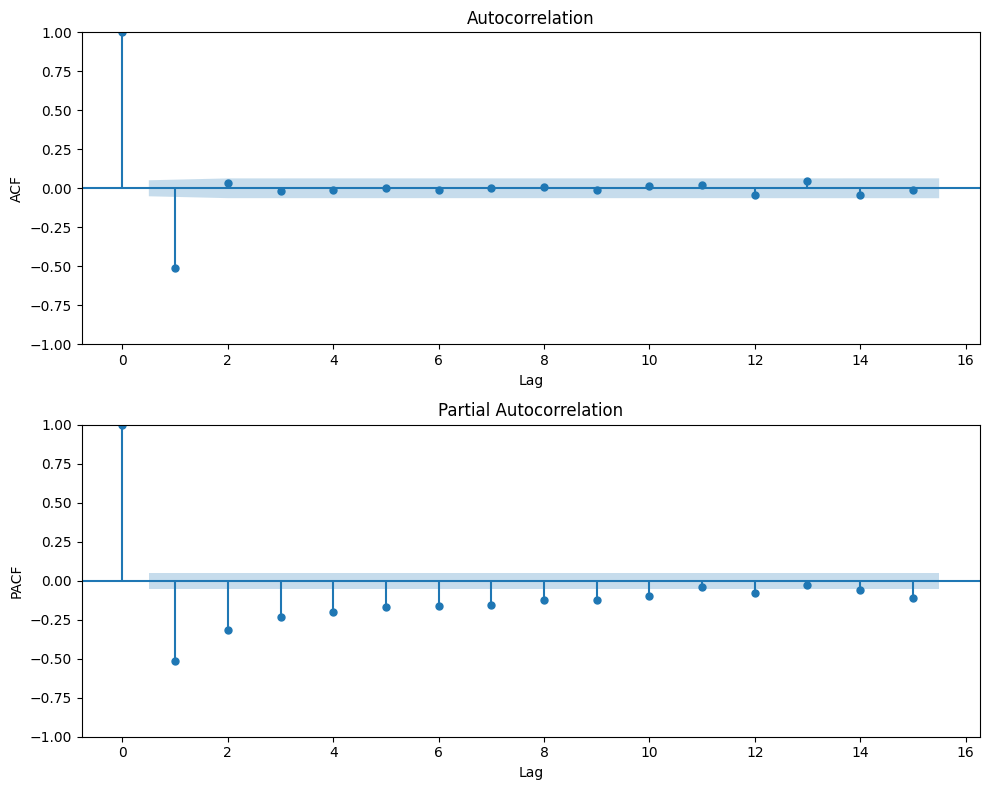

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["diff_log_penjualan"].dropna(), lags=15, ax=ax1)
plt.xlabel("Lag")
plt.ylabel("ACF")

# Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["diff_log_penjualan"].dropna(), lags=15, ax=ax2)
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.tight_layout();
plt.show()

#### Pairplot

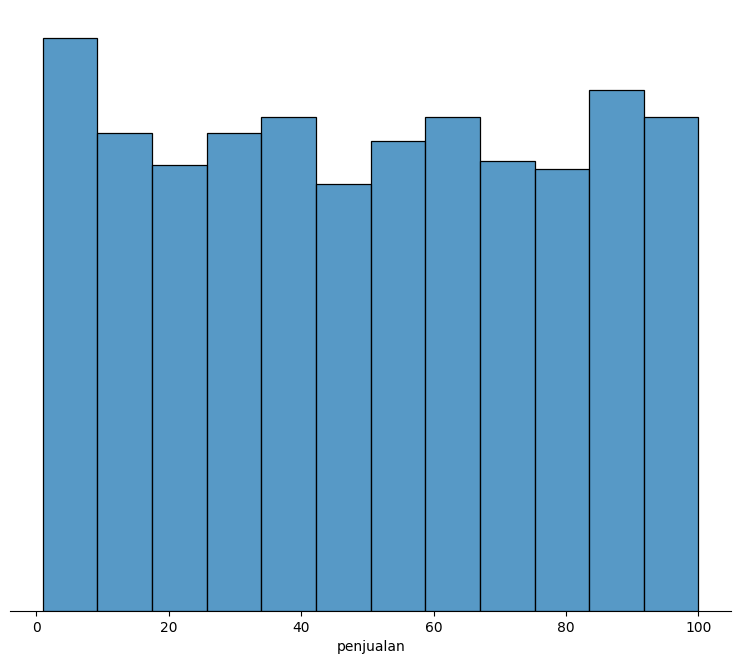

In [ ]:
from matplotlib import rcParams

g = sns.pairplot(df[['penjualan']], corner=True)
g.fig.set_figwidth(8)
g.fig.set_figheight(8)

## Forecasting Modeling

### Check The Data

In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(df) * 0.9)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
print(train.shape)
print(test.shape)

(1314, 3)
(146, 3)


### Naive Model

Pada naive forecast, meramalkan periode berikutnya sama dengan periode sebelumnya.

In [ ]:
# forecast dengan Naive Model
test['naive_forecast'] = train.loc['2023-8-1', 'penjualan']

<Axes: xlabel='tanggal'>

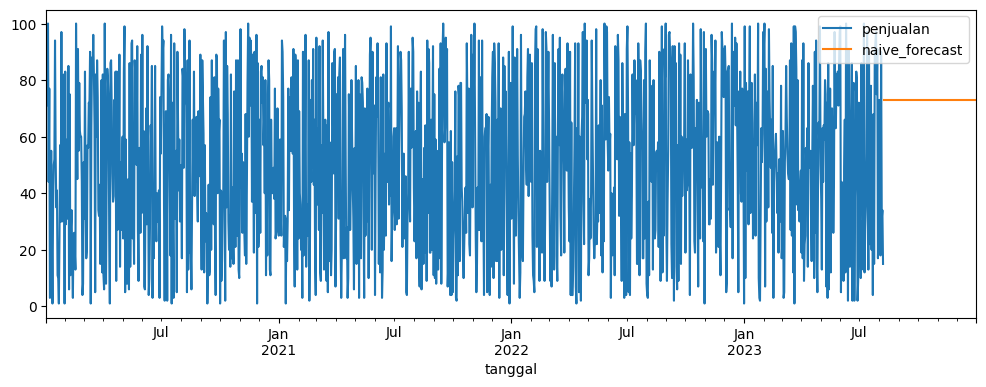

In [ ]:
train["penjualan"].plot(figsize = (12,4), legend=True)
test["naive_forecast"].plot(figsize = (12,4), legend=True)

In [ ]:
# RMSE Naive Model
rmse_naive_model = np.sqrt(mse(test["penjualan"], test["naive_forecast"]))
rmse_naive_model

36.77476800258345

### ARIMA Model

In [ ]:
# Set parameter p dan q dengan value diantara 0 dan 3
p = q = range(0, 10)

# Set d = 1
d = [1]

# Generate semua kombinasi p, q dan d
pdq = list(itertools.product(p, d, q))
print(len(pdq))
pdq

100


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 1, 9),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (2, 1, 9),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (3, 1, 9),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (4, 1, 8),
 (4, 1, 9),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (5, 1, 8),
 (5, 1, 9),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (6, 1, 8),
 (6, 1, 9),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7),
 (7, 1, 8),
 (7, 1, 9),
 (8, 1, 0),
 (8, 1, 1),
 (8, 1, 2),
 (8,

In [ ]:
list_arima = defaultdict(list)

for param in tqdm(pdq):

    # ARIMA model dengan data log penjualan
    results = ARIMA(train["log_penjualan"], order=param).fit()

    list_arima['pdq'].append(param)
    list_arima['aic'].append(results.aic)

100%|██████████| 100/100 [05:17<00:00,  3.18s/it]


In [ ]:
df_arima = pd.DataFrame(list_arima)
df_arima

pdq          aic
0   (0, 1, 0)  4572.067330
1   (0, 1, 1)  3631.044278
2   (0, 1, 2)  3631.727563
3   (0, 1, 3)  3633.665969
4   (0, 1, 4)  3634.923899
..        ...          ...
95  (9, 1, 5)  3646.146070
96  (9, 1, 6)  3648.261937
97  (9, 1, 7)  3644.753476
98  (9, 1, 8)  3652.608142
99  (9, 1, 9)  3653.317276

[100 rows x 2 columns]

In [ ]:
# Model terbaik dengan AIC terendah
best_aic = df_arima.loc[df_arima["aic"].argmin()]
best_aic

pdq      (2, 1, 4)
aic    3628.711336
Name: 24, dtype: object

In [ ]:
# Model ARIMA dengan order terbaik
arima_model = ARIMA(train["log_penjualan"], order = best_aic["pdq"]).fit()

print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:          log_penjualan   No. Observations:                 1314
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1807.356
Date:                Sun, 24 Mar 2024   AIC                           3628.711
Time:                        14:08:07   BIC                           3664.972
Sample:                    01-02-2020   HQIC                          3642.310
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4574      0.002   -709.416      0.000      -1.461      -1.453
ar.L2         -0.9993      0.002   -521.944      0.000      -1.003      -0.996
ma.L1          0.4353     73.585      0.006      0.9

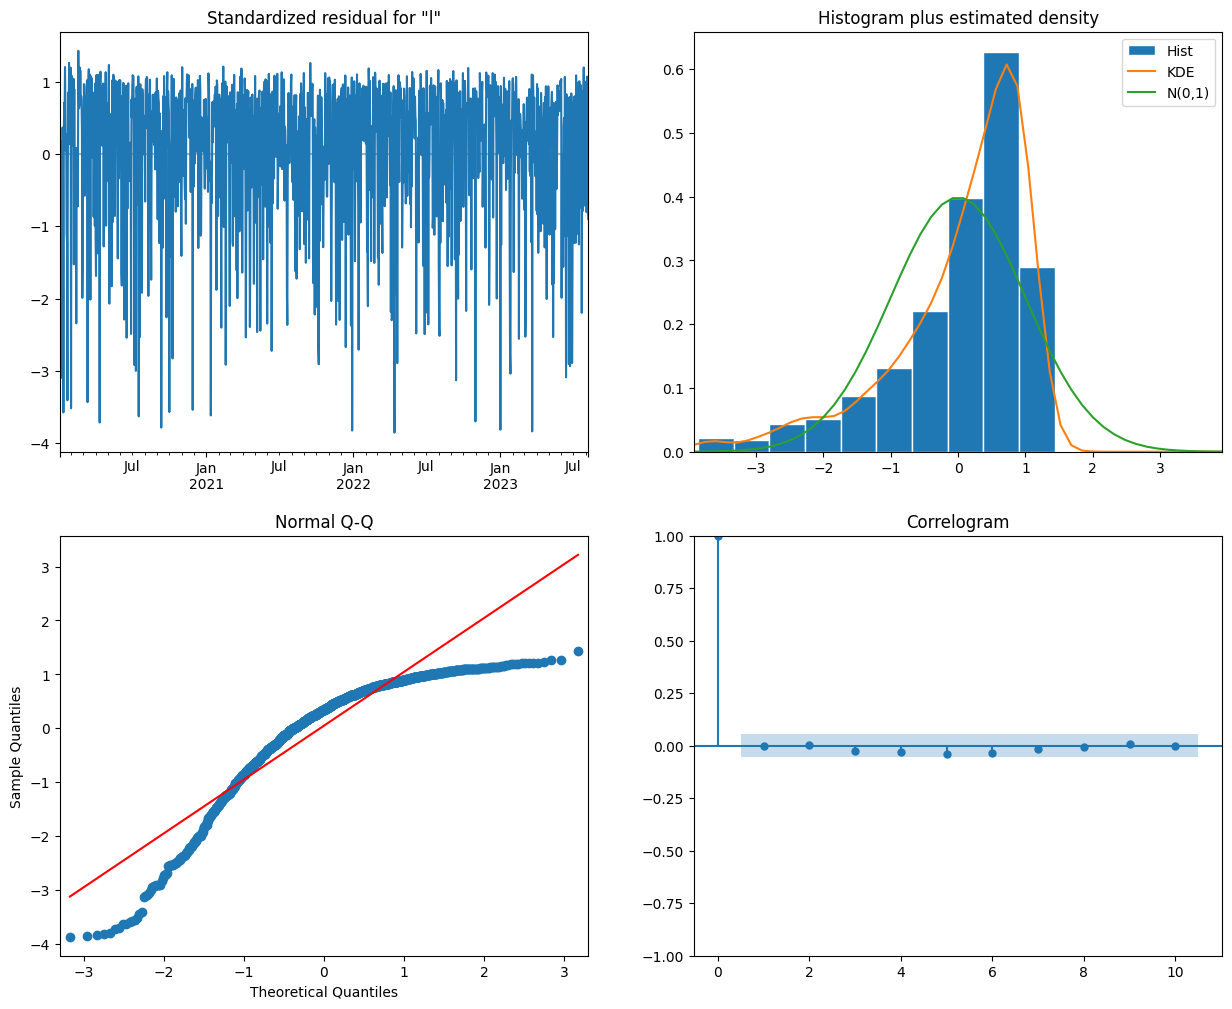

In [ ]:
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Diagnostic model untuk residual pada ARIMA model:

* Stationary
* Left-skewed distribution

In [ ]:
arima_model.forecast(steps =len(test))

2023-08-08    3.770083
2023-08-09    3.442237
2023-08-10    3.707972
2023-08-11    3.632062
2023-08-12    3.477148
                ...   
2023-12-27    3.529981
2023-12-28    3.763646
2023-12-29    3.463239
2023-12-30    3.667562
2023-12-31    3.669970
Freq: D, Name: predicted_mean, Length: 146, dtype: float64

In [ ]:
rmse_arima_model = np.sqrt(mse(test["penjualan"], np.exp(arima_model.forecast(steps = len(test)))))
rmse_arima_model

31.802223806153638

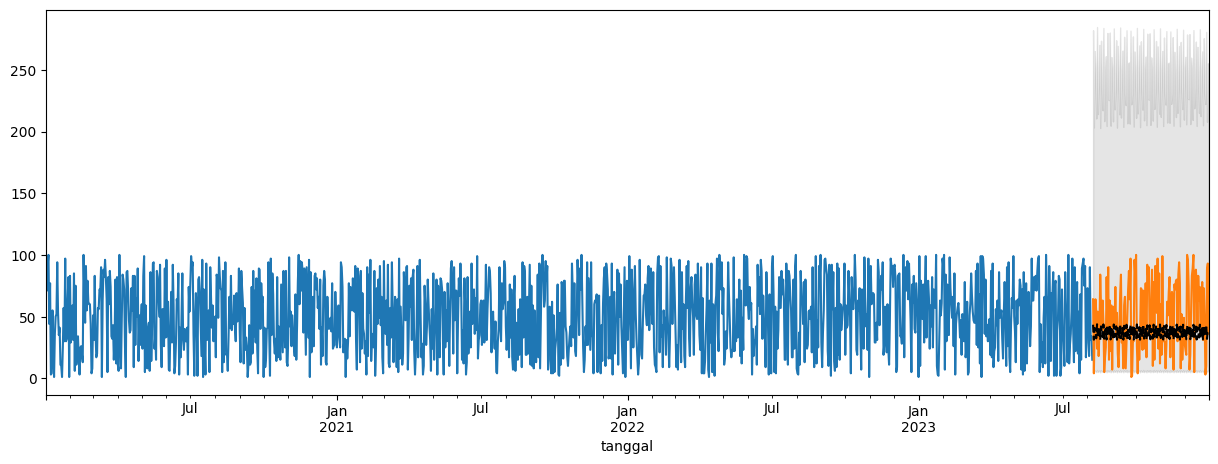

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot data
train["penjualan"].plot(ax = ax)
test["penjualan"].plot(ax = ax)

# Plot forecast
fcast = arima_model.get_forecast(steps = len(test)).summary_frame()
np.exp(fcast['mean']).plot(ax = ax, style='k--')

# Plot conf interval
ax.fill_between(fcast.index,
                np.exp(fcast['mean_ci_lower']),
                np.exp(fcast['mean_ci_upper']), color='k', alpha=0.1)
plt.show()

## Cross Validation

In [ ]:
def cross_validate_arima(X, od_arima, n_fold = 5, test_size = None, gap = 0):
    """
    Function to evaluate RMSE by time series cross-validation.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictors.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    n_fold : int
        Number of n_split for TimeSeriesSplit.

    test_sizes : int
        Number of test_sizes for TimeSeriesSplit.

    gap : int
        Number of gap for TimeSeriesSplit.

    Returns
    -------
    score : float
        The average RMSE score.
    """

    # Placeholder for index
    train_ind_list = []
    valid_ind_list = []

    # Define TS Split
    tscv = TimeSeriesSplit(n_splits = n_fold,
                           test_size = test_size,
                           gap = gap)

    # Get train and valid test index
    for i, (train_index, val_index) in enumerate(tscv.split(X)):
        train_ind_list.append(train_index)
        valid_ind_list.append(val_index)

    # Define the number of train sets
    n_split = len(train_ind_list)

    # Initialize RMSE score list for each valid and train set
    score_list_valid = []
    score_list_train = []
    pred_train = []
    pred_valid = []

    for i in range(n_split):

        # Extract data from index
        X_train = X.iloc[train_ind_list[i]]
        X_valid = X.iloc[valid_ind_list[i]]

        # Fitting model
        model_arima = ARIMA(X_train, order = od_arima).fit()

        # Get fitted values

        start_date = X_valid.index[0]
        end_date = X_valid.index[-1]

        X_pred_train = model_arima.fittedvalues
        X_pred_valid = model_arima.predict(start = start_date,
                                           end = end_date)

        # Calculate RMSE
        rmse_train = np.sqrt(mse(y_true = X_train, y_pred = X_pred_train))
        rmse_valid = np.sqrt(mse(y_true = X_valid, y_pred = X_pred_valid))

        # Append RMSE score in list
        score_list_valid.append(rmse_valid)
        # append RMSE score in list
        score_list_train.append(rmse_train)


        # Append RMSE score in list
        pred_train.append(X_pred_train)
        # append RMSE score in list
        pred_valid.append(X_pred_valid)


    # Calculate CV Score
    score_list = pd.DataFrame({"RMSE_train": score_list_train,
                               "RMSE_valid": score_list_valid})
    score_valid = np.mean(score_list_valid)

    return (train_ind_list,
            valid_ind_list,
            pred_train,
            pred_valid,
            score_valid,
            score_list)

In [ ]:
# Cek CV function
train_ind_list, valid_ind_list, \
X_pred_train, X_pred_valid, \
validation_set_score, score_folds = cross_validate_arima(X = train["penjualan"],
                                                         od_arima = (2, 1, 4))

In [ ]:
n_split = len(train_ind_list)
x_train_list = []
x_valid_list = []

for i in range(n_split):
        x_train_list.append(train["penjualan"].iloc[train_ind_list[i]])
        x_valid_list.append(train["penjualan"].iloc[valid_ind_list[i]])

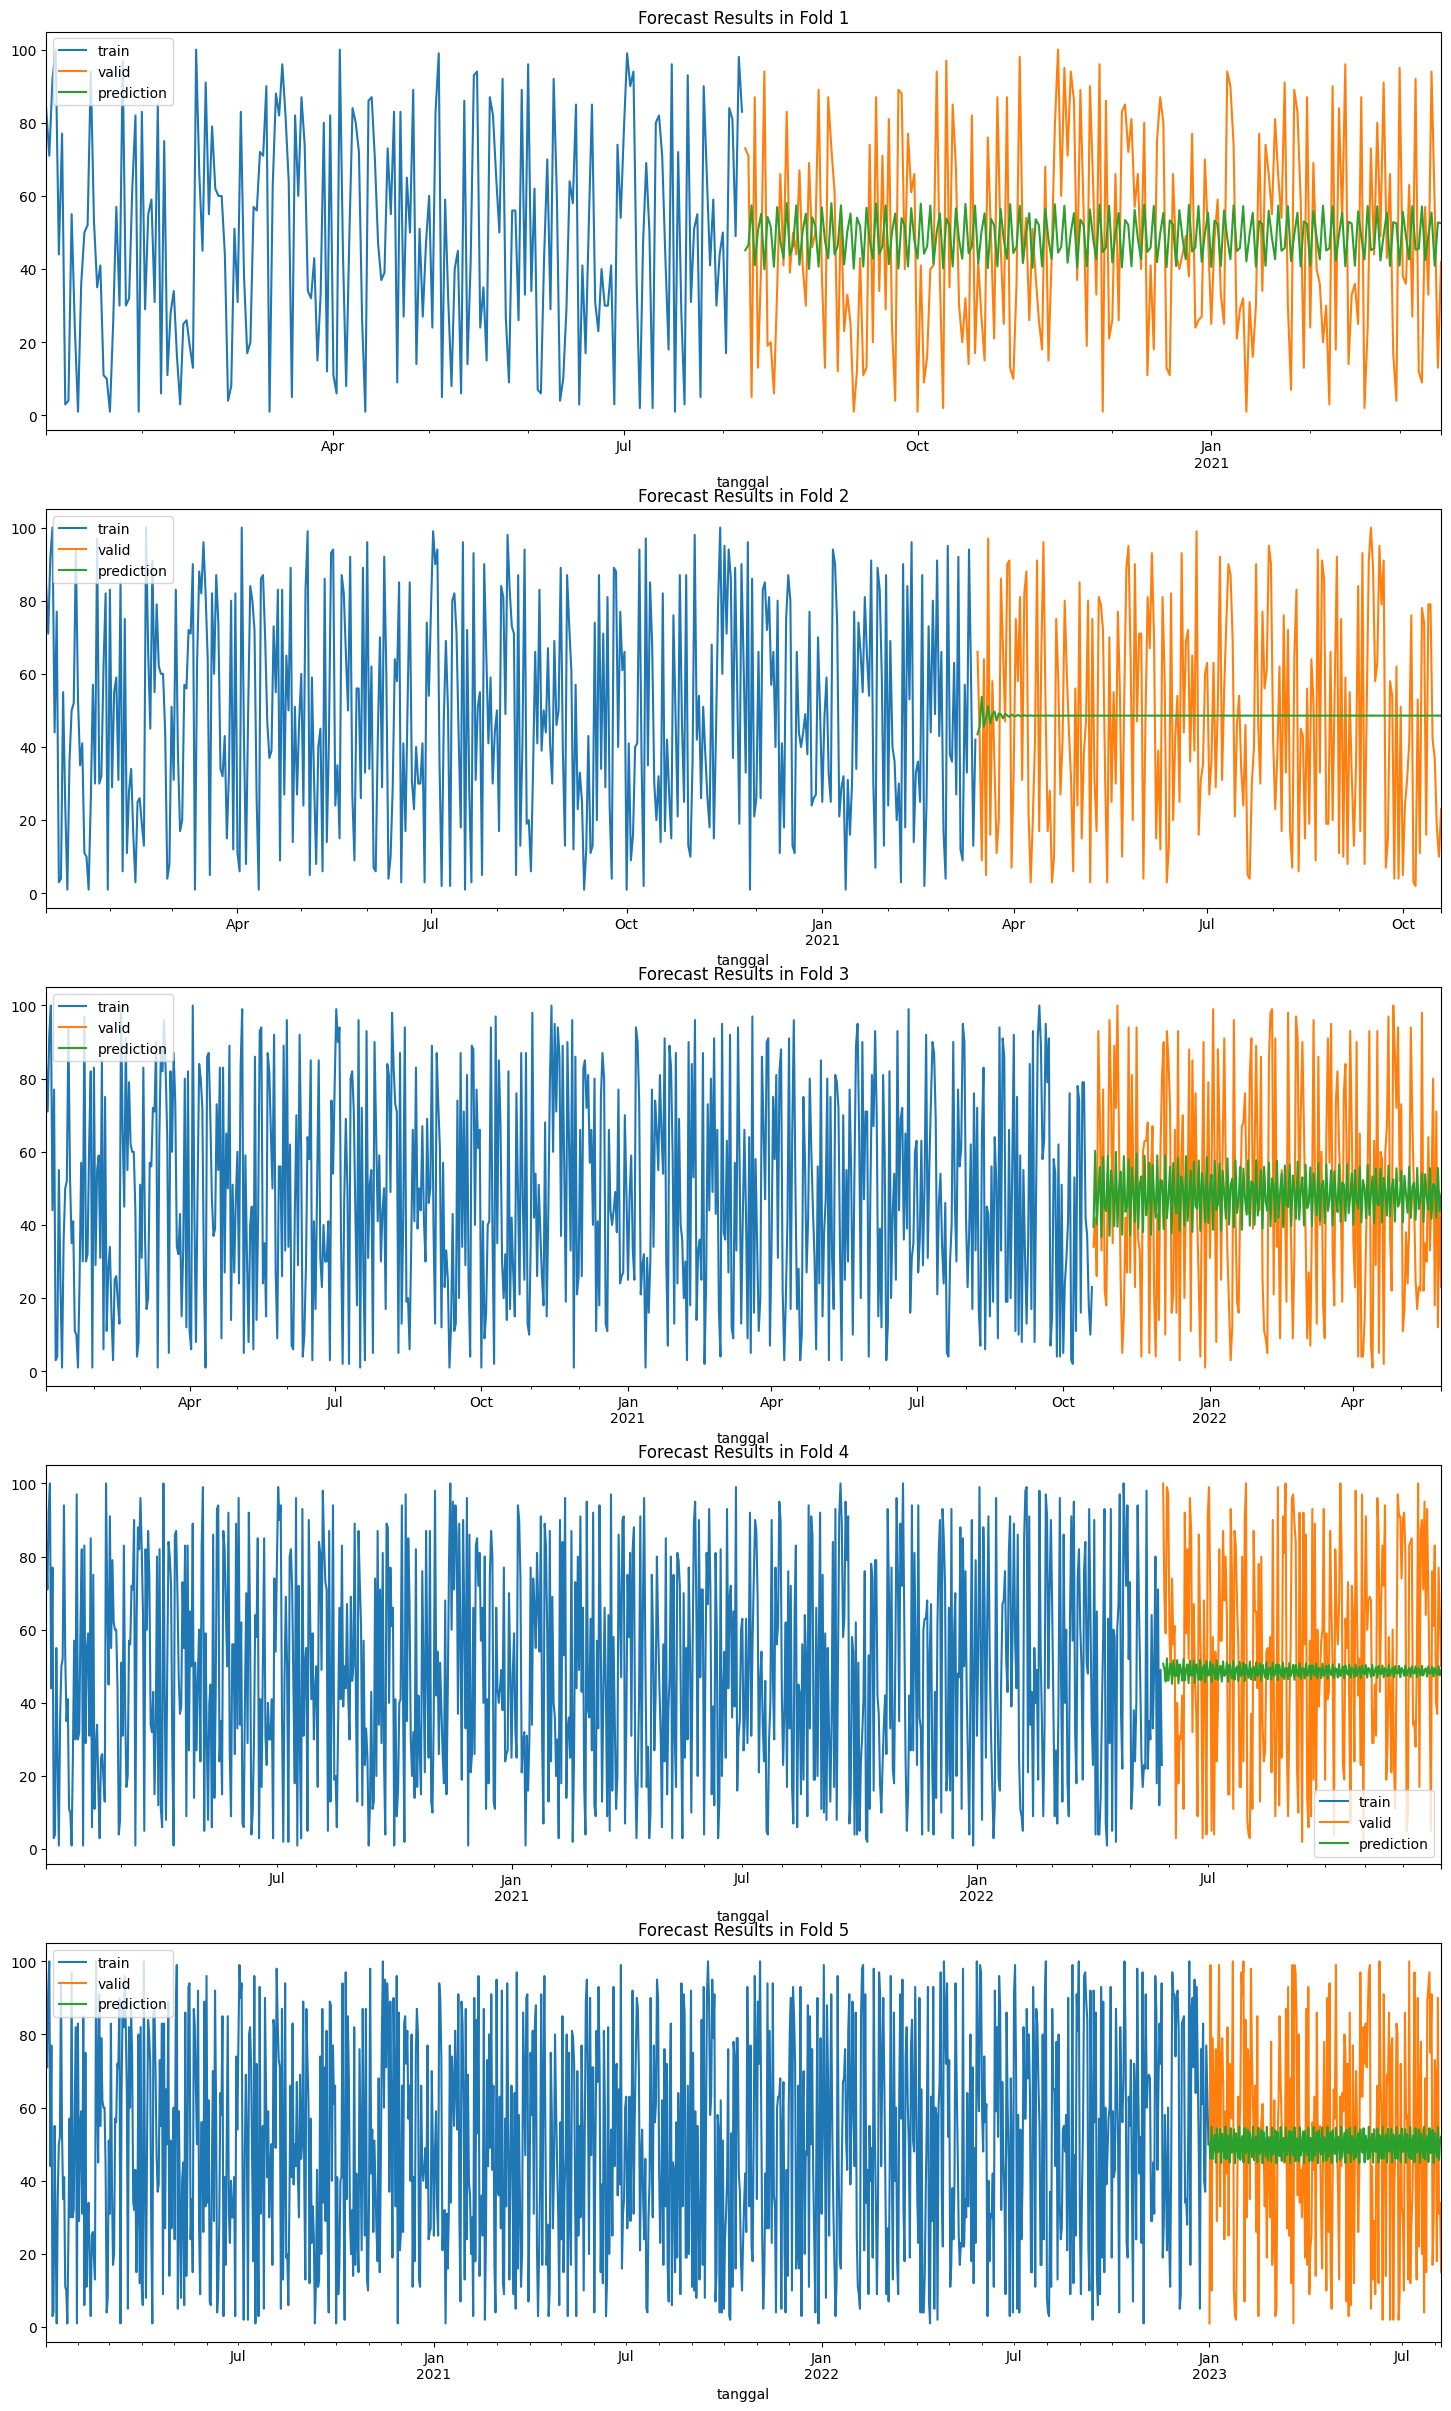

In [ ]:
fig, axes = plt.subplots(5,1,
                        figsize=(18, 30))

for i in range(n_split):
    x_train_list[i].plot(ax = axes[i], label = "train", legend = True)
    x_valid_list[i].plot(ax = axes[i], label = "valid", legend = True)
    X_pred_valid[i].plot(ax = axes[i], label = "prediction", legend = True)

    axes[i].set_title(f"Forecast Results in Fold {i+1}")


plt.show()

In [ ]:
# RSME pada masing-masing fold

fold_rsme = []
for i in range(len(x_valid_list)):
    fold_rsme.append(np.sqrt(mse(x_valid_list[i], X_pred_valid[i])))

folds_rmse = pd.DataFrame({"Fold": [i+1 for i in range(len(fold_rsme))],
                           "RMSE": [fold_rsme[i] for i in range(len(fold_rsme))]})

folds_rmse

Fold       RMSE
0     1  28.962451
1     2  28.776915
2     3  29.986111
3     4  29.967422
4     5  30.061520

In [ ]:
# RSME CV dan train test
summary_score = pd.DataFrame({"Evaluation": ["Cross Validation",
                                             "Train Test Split"],
                              "RMSE": [np.mean(fold_rsme),
                                       rmse_arima_model]})

summary_score

Evaluation       RMSE
0  Cross Validation  29.550884
1  Train Test Split  31.802224

## Best Model

In [ ]:
# Evaluate the model on the testing set
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['penjualan'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['penjualan'], predictions)
mape = np.mean(np.abs((test['penjualan'] - predictions) / test['penjualan'])) * 100

NameError: name 'model_fit' is not defined

In [ ]:
print(f"RMSE from Inflation forecast with")
print(f"Naive model = %f" % rmse_naive_model)
print(f"ARIMA model = %f" % rmse_arima_model)

In [ ]:
arima_model.summary()

In [ ]:
train["penjualan"].plot(figsize = (10,4), legend = True)
np.exp(arima_model.fittedvalues).plot(figsize = (10,4), label = "fitted values", legend = True)

plt.show()